**Case study – Enron email classification**

Importing all the necessary libraries for data manipulation and analysis.

Installing NLTK

In [1]:
pip install nltk

In [0]:
import nltk
from nltk.corpus import stopwords

In [55]:

nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
%matplotlib inline

Importing the necessary libraries for data vectorization and modelling.

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.preprocessing import normalize 
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
print("completed")

completed


Uploading the data set CSV file. Using Google COLAB for the Case study.


In [0]:
# from google.colab import files
# uploaded = files.upload()

In [0]:
# import io
# test_df = pd.read_csv(io.BytesIO(uploaded['enron_cleaned_sent_emails.csv']))

Reading CSV file into a data frame "**data_df**".





In [0]:
data_df = pd.read_csv('enron_cleaned_sent_emails.csv')

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Viewing the top 5 rows of the data frame.

In [12]:
data_df.head()

,file,body
0,allen-p/_sent_mail/1.,Here is our forecast\n\n
1,allen-p/_sent_mail/10.,Traveling to have a business meeting takes the...
2,allen-p/_sent_mail/100.,test successful. way to go!!!
3,allen-p/_sent_mail/1000.,"Randy,\n\n Can you send me a schedule of the s..."
4,allen-p/_sent_mail/1001.,Let's shoot for Tuesday at 11:45.


Shape gives the dimension of the data frame.

In [13]:
data_df.shape

(126846, 2)

File column is constructed as <sender_name>/<mailbox_type>/<file_number>.
So split the file column as sender_name, mailbox_type and file_number.

In [0]:
temp = data_df["file"].str.split("/", n = 1, expand = True) 

In [15]:
temp.head()

,0,1
0,allen-p,_sent_mail/1.
1,allen-p,_sent_mail/10.
2,allen-p,_sent_mail/100.
3,allen-p,_sent_mail/1000.
4,allen-p,_sent_mail/1001.


In [0]:
data_df["sender_name"]=temp[0]

In [0]:
temp1 = temp[1].str.split("/", n = 1, expand = True) 

In [0]:
data_df["mailbox_type"]=temp1[0]

In [0]:
data_df["file_number"]=temp1[1]

In [20]:
data_df.head()

,file,body,sender_name,mailbox_type,file_number
0,allen-p/_sent_mail/1.,Here is our forecast\n\n,allen-p,_sent_mail,1.
1,allen-p/_sent_mail/10.,Traveling to have a business meeting takes the...,allen-p,_sent_mail,10.
2,allen-p/_sent_mail/100.,test successful. way to go!!!,allen-p,_sent_mail,100.
3,allen-p/_sent_mail/1000.,"Randy,\n\n Can you send me a schedule of the s...",allen-p,_sent_mail,1000.
4,allen-p/_sent_mail/1001.,Let's shoot for Tuesday at 11:45.,allen-p,_sent_mail,1001.


Dropping the file column.

In [0]:
data_df.drop(columns =["file"], inplace = True) 

let's visualize the data.


Visualizing the Mailbox_type column.

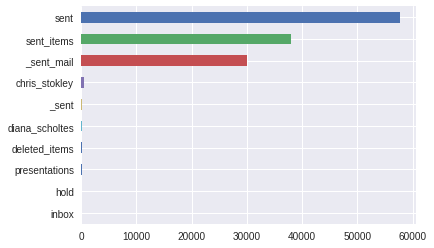

In [22]:
data_df['mailbox_type'].value_counts().plot('barh').invert_yaxis() #horizontal bar plot

In [23]:
data_df.mailbox_type.unique()

array(['_sent_mail', 'sent_items', 'sent', 'presentations',
       'deleted_items', '_sent', 'hold', 'inbox', 'diana_scholtes',
       'chris_stokley'], dtype=object)

The data belongs to the sent messages.  
From the above visualization, we can see that there are 4 types of sent mailboxes.
All four represent the same, so we can go ahead and combine them.


In [24]:
data_df.loc[data_df['mailbox_type'] == 'presentations', 'sender_name'].value_counts()

kean-s         61
kaminski-v     21
mcconnell-m    15
blair-l        10
shapiro-r       1
arora-h         1
rogers-b        1
Name: sender_name, dtype: int64

We do have the data of the different mailbox types from a person.

In [25]:
data_df.loc[data_df['sender_name'] == 'blair-l','mailbox_type'].unique()

array(['_sent_mail', 'deleted_items', 'presentations', 'sent_items'],
      dtype=object)

Grouping the sent mailboxes. 

In [0]:
data_df['mailbox_type'] = data_df['mailbox_type'].map({'_sent_mail': 'sent','sent_items': 'sent','sent': 'sent','deleted_items': 'deleted_items','presentations': 'presentations','hold': 'hold','_sent': 'sent','inbox': 'inbox','diana_scholtes': 'diana_scholtes','chris_stokley': 'chris_stokley'})

In [28]:
data_df.mailbox_type.unique()

array(['sent', 'presentations', 'deleted_items', 'hold', 'inbox',
       'diana_scholtes', 'chris_stokley'], dtype=object)

In [29]:
data_df.loc[data_df['sender_name'] == 'stokley-c','mailbox_type'].unique()

array(['chris_stokley'], dtype=object)

In [30]:
data_df.loc[data_df['sender_name'] == 'scholtes-d','mailbox_type'].unique()

array(['diana_scholtes', 'sent'], dtype=object)

In [31]:
data_df.loc[data_df['mailbox_type'] == 'chris_stokley','sender_name'].unique()

array(['stokley-c'], dtype=object)

In [32]:
data_df.loc[data_df['mailbox_type'] == 'diana_scholtes','sender_name'].unique()

array(['scholtes-d'], dtype=object)

In [33]:
data_df.loc[data_df['mailbox_type'] == 'hold','sender_name'].unique()

array(['hayslett-r'], dtype=object)

In [34]:
data_df.loc[data_df['sender_name'] == 'hayslett-r','mailbox_type'].unique()

array(['sent', 'hold'], dtype=object)

In [35]:
data_df.loc[data_df['mailbox_type'] == 'deleted_items','sender_name'].unique()

array(['blair-l', 'horton-s'], dtype=object)

In [36]:
data_df.loc[data_df['mailbox_type'] == 'presentations','sender_name'].unique()

array(['arora-h', 'blair-l', 'kaminski-v', 'kean-s', 'mcconnell-m',
       'rogers-b', 'shapiro-r'], dtype=object)

In [37]:
data_df.loc[data_df['mailbox_type'] == 'inbox','sender_name'].unique()

array(['mccarty-d'], dtype=object)

In [38]:
data_df.loc[data_df['sender_name'] == 'mccarty-d','mailbox_type'].unique()

array(['inbox', 'sent'], dtype=object)

In [39]:
data_df.mailbox_type.value_counts()

sent              125948
chris_stokley        515
diana_scholtes       132
deleted_items        128
presentations        110
hold                  10
inbox                  3
Name: mailbox_type, dtype: int64

From the above analysis, it's clear that hayslett-r(hold), scholtes-d(diana_scholtes) and stokley-c(chris_stokley) are having the only one mailbox type. So we can change these mailbox types into the sent mailbox. 

In [0]:
data_df['mailbox_type'] = data_df['mailbox_type'].map({'sent': 'sent','deleted_items': 'deleted_items','presentations': 'presentations','hold': 'sent','inbox': 'inbox','diana_scholtes': 'sent','chris_stokley': 'sent'})

In [41]:
data_df.mailbox_type.value_counts()

sent             126605
deleted_items       128
presentations       110
inbox                 3
Name: mailbox_type, dtype: int64

Checking whether there are any empty strings in the data frame.

In [42]:
np.where(pd.isnull(data_df))

(array([], dtype=int64), array([], dtype=int64))

In [43]:
np.where(data_df.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

Now, let's visualize the top 10 senders.

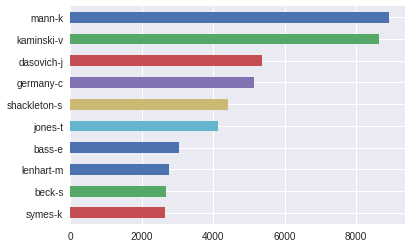

In [26]:
data_df['sender_name'].value_counts().head(10).plot('barh').invert_yaxis() #horizontal bar plot

In [84]:
data_df['sender_name'].value_counts().head(10)

mann-k          8926
kaminski-v      8644
dasovich-j      5366
germany-c       5128
shackleton-s    4407
jones-t         4123
bass-e          3030
lenhart-m       2759
beck-s          2674
symes-k         2649
Name: sender_name, dtype: int64

Exploring the body column. 

In [44]:
data_df.body.iloc[5]

'Greg,\n\n How about either next Tuesday or Thursday?\n\nPhillip'

There are many next line characters and special characters.
So we can remove all of them using Regular expressions.

In [0]:
import re

In [0]:
REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)|(\\n)|(\>)|(\<)")
def preprocess_messages(message):
    message = [REPLACE_NO_SPACE.sub("", line.lower()) for line in message]
    message = [REPLACE_WITH_SPACE.sub(" ", line) for line in message]
    
    return message

In [0]:
data_df["body_clean"]= preprocess_messages(data_df.body)

In [48]:
data_df.body_clean.iloc[0]

'here is our forecast   '

The above data is clean now. it's not having the special characters. 

Vectorization of cleaned body data.

In [0]:
# from sklearn.feature_extraction.text import CountVectorizer

In [0]:
# cv = CountVectorizer(binary=True)
# cv.fit(data_df.body_clean)
# X = cv.transform(data_df.body_clean)

Removing the stop words. So that the data size will be minimized while maintaining the semantics.

In [0]:
# from nltk.corpus import stopwords
# stop_words=['in','of','at','a','the']
stop_words = stopwords.words('english')
def remove_stop_words(corpus):
    removed_stop_words = []
    for message in corpus:
        removed_stop_words.append(
            ' '.join([word for word in message.split() 
                      if word not in stop_words])
        )
    return removed_stop_words

no_stop_words = remove_stop_words(data_df.body_clean)

In [60]:

no_stop_words[5]

'greg either next tuesday thursday phillip'

let's perform some stemming algorithms. This will transform the words into its root form. So a search involving any of these words will treat them as the same word which is the root word. So, it becomes essential to link all the words into their root word. 

In [0]:
def get_stemmed_text(corpus):
    from nltk.stem.porter import PorterStemmer
    stemmer = PorterStemmer()
    return [' '.join([stemmer.stem(word) for word in message.split()]) for message in corpus]

stemmed_messages = get_stemmed_text(no_stop_words)

In [0]:
def get_lemmatized_text(corpus):
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in message.split()]) for message in corpus]

lemmatized_messages = get_lemmatized_text(no_stop_words)

In [0]:
data_df["stemmed_messages"]=stemmed_messages

In [90]:
no_stop_words[10]

'mr buckner delivered gas behind san diego enron energy services appropriate enron entity forwarded request zarin imam ees phone number 713 853 7107 phillip allen'

In [91]:
lemmatized_messages[10]

'mr buckner delivered gas behind san diego enron energy service appropriate enron entity forwarded request zarin imam ee phone number 713 853 7107 phillip allen'

In [92]:
stemmed_messages[10]

'mr buckner deliv ga behind san diego enron energi servic appropri enron entiti forward request zarin imam ee phone number 713 853 7107 phillip allen'

Looks like The Porter stemming algorithm performed well on our data than the WordNet Lemmatizer. It trimmed many of our words. But whereas  WordNet Lemmatizer trimmed very fewer words. 

**TfidfVectorizer ** The goal of using tf-idf is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.

In [0]:
def top_tfidf_feats(row, features, top_n=20):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats, columns=['features', 'score'])
    return df

def top_feats_in_doc(X, features, row_id, top_n=25):
    row = np.squeeze(X[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

def top_mean_feats(X, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    if grp_ids:
        D = X[grp_ids].toarray()
    else:
        D = X.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

def top_feats_per_cluster(X, y, features, min_tfidf=0.1, top_n=25):
    dfs = []

    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label) 
        feats_df = top_mean_feats(X, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

def plot_tfidf_classfeats_h(dfs):
    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title("cluster = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.score, align='center', color='#7530FF')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.features)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

In [0]:
vect = TfidfVectorizer(stop_words='english', max_df=0.50, min_df=2)
X = vect.fit_transform(data_df.stemmed_messages)

In [0]:
data_df["X"]=X

In [0]:
# X_dense = X.todense()
# coords = PCA(n_components=2).fit_transform(X_dense)
# plt.scatter(coords[:, 0], coords[:, 1], c='m')
# plt.show()

In [0]:
features = vect.get_feature_names()

In [0]:
to_fe=top_feats_in_doc(X, features, 1, 10)

Top 10 features of the messages. 

In [69]:
to_fe

,features,score
0,meet,0.329452
1,trip,0.322822
2,ski,0.307456
3,busi,0.302501
4,present,0.180921
5,suggest,0.179837
6,stimul,0.178820
7,jet,0.163892
8,honest,0.159357
9,quiet,0.155079


From above its clear that they are discussing about the meetings more.
And then they are discussing about their trips, business and presentations.
Also, they are receiving or giving more suggestions. 

For our target variable Sender, we are using CountVectorizer.
Because it should not LEMMATIZE or STEM the data.

In [70]:
vectorizer = CountVectorizer()
vectorizer.fit(data_df.sender_name)
vector = vectorizer.transform(data_df.sender_name)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [0]:
data_df["Y"]=vector

In [72]:
data_df.head()

,body,sender_name,mailbox_type,file_number,body_clean,stemmed_messages,X,Y
0,Here is our forecast\n\n,allen-p,sent,1.,here is our forecast,forecast,"(0, 72793)\t1.0\n (1, 143624)\t0.1123615370...","(0, 0)\t1\n (1, 0)\t1\n (2, 0)\t1\n (3, 0..."
1,Traveling to have a business meeting takes the...,allen-p,sent,10.,traveling to have a business meeting takes the...,travel busi meet take fun trip especi prepar p...,"(0, 72793)\t1.0\n (1, 143624)\t0.1123615370...","(0, 0)\t1\n (1, 0)\t1\n (2, 0)\t1\n (3, 0..."
2,test successful. way to go!!!,allen-p,sent,100.,test successful way to go,test success way go,"(0, 72793)\t1.0\n (1, 143624)\t0.1123615370...","(0, 0)\t1\n (1, 0)\t1\n (2, 0)\t1\n (3, 0..."
3,"Randy,\n\n Can you send me a schedule of the s...",allen-p,sent,1000.,randy can you send me a schedule of the sala...,randi send schedul salari level everyon schedu...,"(0, 72793)\t1.0\n (1, 143624)\t0.1123615370...","(0, 0)\t1\n (1, 0)\t1\n (2, 0)\t1\n (3, 0..."
4,Let's shoot for Tuesday at 11:45.,allen-p,sent,1001.,lets shoot for tuesday at 1145,let shoot tuesday 1145,"(0, 72793)\t1.0\n (1, 143624)\t0.1123615370...","(0, 0)\t1\n (1, 0)\t1\n (2, 0)\t1\n (3, 0..."


In [0]:
# to_me=top_mean_feats(X, features, None, 0.1, 10)

In [0]:
# to_me

In [0]:
# data_df.head()

In [0]:
# l=len(data_df["sender_name"].value_counts())

Now we can build a classification model to predict sender given email content.
let's use the logistic algorithm. 

In [0]:
 from sklearn import neighbors, datasets, preprocessing

In [0]:
 from sklearn.metrics import accuracy_score

In [0]:
X,Y=data_df.X, data_df.Y

Splitting the data into training and testing.

In [0]:
#  train, test_df = train_test_split(test_df, test_size=0.2)
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [77]:
# X.shape

(126846,)

In [0]:
# data_df.head()

In [0]:
# X=data_df["X"]

In [0]:
# Y=data_df["Y"]

In [93]:
 scaler = preprocessing.StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

ValueError: ignored

In [0]:
# X_train.describe

In [0]:
# X_test.shape

In [0]:
# y_train.describe

In [0]:
# y_test.shape

In [0]:
# X_train.iloc[0]

In [0]:
# y_train.iloc[0]

In [0]:
# from sklearn.preprocessing import StandardScaler

In [0]:
# scaler = StandardScaler()

In [0]:
# scaler.fit(X_train)

In [0]:
# classifier = LogisticRegression(random_state=0)
# classifier.fit(X_train, y_train)

In [0]:
# lr = LogisticRegression().fit(X_train, y_train)